# 최근접 이웃(K-Nearast-Neighbor)
    * 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
    * 분류와 회귀 모두 지원
    
    * Non-Paramatric Model, Instance-Base Model 이라고도 함

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [64]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류
    * 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트 출력
    * k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붗꽃 데이터

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [7]:
model = KNeighborsClassifier().fit(X_train, y_train)

In [8]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.975
평가 데이터 점수: 0.9666666666666667


In [ ]:
model = KNeighborsClassifier().fit(X_train_scaled, y_train)

In [9]:
print("학습 데이터 점수: {}".format(model.score(X_train_scaled, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scaled, y_test)))

학습 데이터 점수: 0.325
평가 데이터 점수: 0.36666666666666664


In [11]:
cross_validate(estimator = KNeighborsClassifier(),
              X = X, y = y, cv = 5, 
              n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    1.7s finished


{'fit_time': array([0.00099754, 0.00099707, 0.00099778, 0.00099778, 0.00099754]),
 'score_time': array([0.00299168, 0.00199533, 0.00199413, 0.00199413, 0.00337529]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [12]:
param_grid = [{'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tre', 'brute']}]

In [13]:
gs = GridSearchCV(estimator = KNeighborsClassifier(),
                 param_grid = param_grid,
                 n_jobs = multiprocessing.cpu_count(),
                 verbose = True)

In [14]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.96666667 0.96666667 0.97333333 0.96666667 0.98       0.98
        nan        nan        nan        nan        nan        nan
 0.96666667 0.96666667 0.97333333 0.96666667 0.98       0.98      ]
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=12,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tre', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [16]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [18]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9800000000000001


In [ ]:
# 시각화

In [19]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [20]:
# 저차원으로 변환
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)

In [21]:
iris_comp_df = pd.DataFrame(data = X_comp)
iris_comp_df['Target'] = y
iris_comp_df
## 오직 두개의 feature값과 하나의 y값으로 나타남

,0,1,Target
0,20.353788,13.554842,0
1,23.023094,13.942665,0
2,22.782240,12.858302,0
3,23.235487,13.097954,0
4,20.286959,13.137441,0
...,...,...,...
145,-16.298883,-6.148242,2
146,-13.398367,-4.782732,2
147,-15.464082,-5.799846,2
148,-16.803579,-6.933032,2


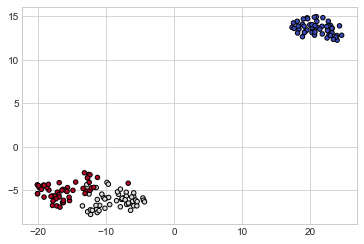

In [22]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20,
           edgecolors = 'k')

In [24]:
model = KNeighborsClassifier().fit(X_comp, y)
predcit = model.predict(X_comp)

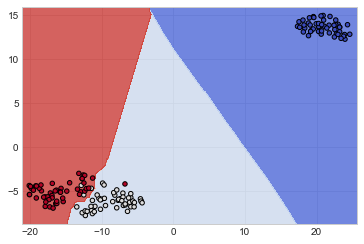

In [26]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha = .8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c = y , cmap = plt.cm.coolwarm, s = 20,
           edgecolors = 'k')

## 유방암 데이터

In [27]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [28]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [39]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [37]:
model = KNeighborsClassifier().fit(X_train, y_train)

In [38]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9472527472527472
평가 데이터 점수: 0.9122807017543859


In [40]:
model = KNeighborsClassifier().fit(X_train_scale, y_train)

In [41]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9802197802197802
평가 데이터 점수: 0.9736842105263158


In [43]:
estimator = make_pipeline(StandardScaler(),
                         KNeighborsClassifier())

In [44]:
cross_validate(estimator = estimator,
              X = X, y = y, cv = 5, 
              n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    1.6s finished


{'fit_time': array([0.00188375, 0.00299311, 0.00198936, 0.00188375, 0.00199485]),
 'score_time': array([0.00797868, 0.00667882, 0.00867367, 0.0069809 , 0.00867462]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [46]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier())])

In [47]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
              'model__weights': ['uniform', 'distance'],
              'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [48]:
gs = GridSearchCV(estimator = pipe,
                 param_grid = param_grid,
                 n_jobs = multiprocessing.cpu_count(),
                 verbose = True)

In [51]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=12,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [52]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [53]:
print('Grid Search CV best score: {}'.format(gs.best_score_))

Grid Search CV best score: 0.9701288619779538


In [54]:
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)

In [59]:
cancer_comp_df = pd.DataFrame(data =X_comp)
cancer_comp_df['target'] = y 
cancer_comp_df

,0,1,target
0,27.873163,-9.738531,0
1,30.026569,-8.172588,0
2,28.260908,-3.515407,0
3,-13.892763,-6.482635,0
4,25.924992,-3.000805,0
...,...,...,...
564,31.363678,-9.309250,0
565,27.995733,-4.624960,0
566,17.908613,12.555824,0
567,29.102745,-6.085420,0


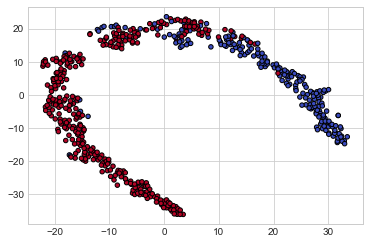

In [60]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20,
           edgecolors = 'k');

In [61]:
model = KNeighborsClassifier().fit(X_comp, y)
predict = model.predict(X_comp)

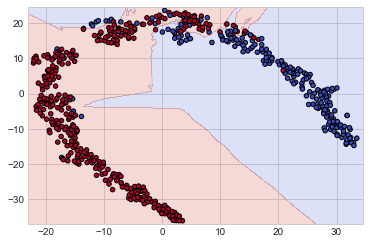

In [63]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = .2)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20,
           edgecolors = 'k')

## 와인 데이터

In [65]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['Target'] = wine.target
wine_df[:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [66]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [68]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [73]:
model = KNeighborsClassifier().fit(X_train_scale, y_train)

In [74]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.967032967032967
평가 데이터 점수: 1.0


In [71]:
model = KNeighborsClassifier().fit(X_train, y_train)

In [72]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9428571428571428
평가 데이터 점수: 0.956140350877193


In [ ]:

tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20,
           edgecolors = 'k');
model = KNeighborsClassifier().fit(X_comp, y)
predict = model.predict(X_comp)

In [75]:
estimator = make_pipeline(StandardScaler(),
                         KNeighborsClassifier())

cross_validate(estimator = estimator,
              X = X, y = y, cv = 5, 
              n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    1.5s finished


{'fit_time': array([0.00099516, 0.0019927 , 0.00199366, 0.0009973 , 0.00199747]),
 'score_time': array([0.00598478, 0.00598383, 0.00598454, 0.0059855 , 0.0059855 ]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [77]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier())])

param_grid = [{'model__n_neighbors': [3, 5, 7],
              'model__weights': ['uniform', 'distance'],
              'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

gs = GridSearchCV(estimator = pipe,
                 param_grid = param_grid,
                 n_jobs = multiprocessing.cpu_count(),
                 verbose = True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=12,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [78]:
print(gs.best_estimator_)
print('Grid Search CV best score: {}'.format(gs.best_score_))

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])
Grid Search CV best score: 0.9701288619779538


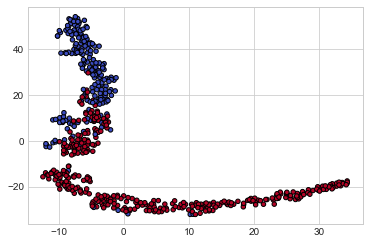

In [79]:
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20,
           edgecolors = 'k');

In [80]:
model = KNeighborsClassifier().fit(X_comp, y)
predict = model.predict(X_comp)

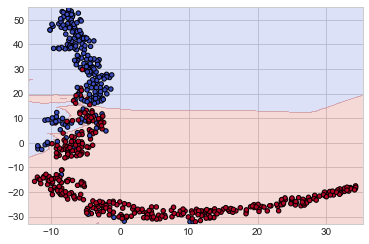

In [81]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = .2)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20,
           edgecolors = 'k')

## K 최근접 이웃 회귀
    * 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
    * 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [82]:
boston = load_boston()

In [83]:
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df['Target'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [84]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [85]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [86]:
model = KNeighborsRegressor().fit(X_train, y_train)

In [87]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6640883865328
평가 데이터 점수: 0.5823839846900565


In [88]:
model = KNeighborsRegressor().fit(X_train_scale, y_train)

In [89]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.8435955105974053
평가 데이터 점수: 0.7691419903809369


In [90]:
estimator = make_pipeline(StandardScaler(),
                         KNeighborsRegressor())

cross_validate(estimator = estimator,
              X = X, y = y, cv = 5, 
              n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    1.5s finished


{'fit_time': array([0.00199533, 0.00399089, 0.00199366, 0.00300121, 0.00199461]),
 'score_time': array([0.00299263, 0.00399828, 0.0030005 , 0.00398922, 0.00299001]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [91]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor())])

param_grid = [{'model__n_neighbors': [3, 5, 7],
              'model__weights': ['uniform', 'distance'],
              'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

gs = GridSearchCV(estimator = pipe,
                 param_grid = param_grid,
                 n_jobs = multiprocessing.cpu_count(),
                 verbose = True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=12,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [92]:
print(gs.best_estimator_)
print('Grid Search CV best score: {}'.format(gs.best_score_))

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])
Grid Search CV best score: 0.4973060611762845


In [97]:
tsne = TSNE(n_components = 1)
X_comp = tsne.fit_transform(X)

In [99]:
boston_comp_df = pd.DataFrame(data = X_comp)
boston_comp_df['target'] = y
boston_comp_df

,0,target
0,21.055752,24.0
1,46.771564,21.6
2,42.956974,34.7
3,43.927948,33.4
4,44.203663,36.2
...,...,...
501,28.193886,22.4
502,28.856750,20.6
503,29.655184,23.9
504,29.609842,22.0


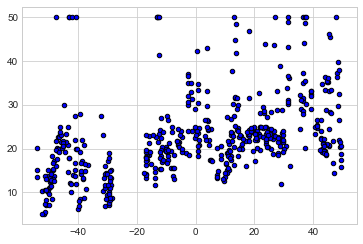

In [100]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors = 'k')

In [102]:
model = KNeighborsRegressor().fit(X_comp, y)
predict = model.predict(X_comp)

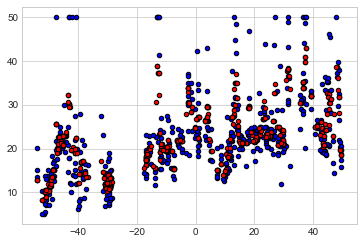

In [103]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors = 'k')
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors = 'k')

### 캘리포니아 주택 가격 데이터

In [104]:
california = fetch_california_housing()
california_df = pd.DataFrame(data = california.data, columns = california.feature_names)
california_df['Target'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [106]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

model = KNeighborsRegressor().fit(X_train_scale, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.7929155756931274
평가 데이터 점수: 0.6872340365273829


In [107]:
estimator = make_pipeline(StandardScaler(),
                         KNeighborsRegressor())

cross_validate(estimator = estimator,
              X = X, y = y, cv = 5, 
              n_jobs = multiprocessing.cpu_count(),
              verbose = True)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    1.9s finished


{'fit_time': array([0.08809304, 0.04226661, 0.04175043, 0.04378009, 0.04378009]),
 'score_time': array([0.75338554, 0.33531094, 0.34628129, 0.41812849, 0.39515042]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [110]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor())])

param_grid = [{'model__n_neighbors': [3, 5, 7],
              'model__weights': ['uniform', 'distance'],
              'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

gs = GridSearchCV(estimator = pipe,
                 param_grid = param_grid,
                 n_jobs = multiprocessing.cpu_count(),
                 verbose = True)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=12,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [111]:
print(gs.best_estimator_)
print('Grid Search CV best score: {}'.format(gs.best_score_))

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])
Grid Search CV best score: 0.5376515274379832


In [112]:
tsne = TSNE(n_components = 1)
X_comp = tsne.fit_transform(X)

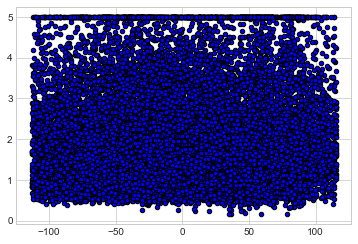

In [113]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors = 'k')

In [114]:
model = KNeighborsRegressor().fit(X_comp, y)
predict = model.predict(X_comp)

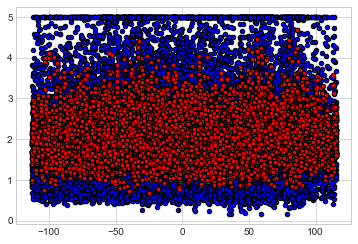

In [115]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors = 'k')
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors = 'k')